# Analyzing Lasso Regression Results for Distance Analysis
### Laurence Nickel (i6257119)

Libraries used: 
* pandas (version: '1.2.4')
* re (version: '2.2.1')
* sys (version: '3.8.8')
* os (version: '3.8.8')
* plotly.express (version: '5.13.1')
* seaborn (version: '0.11.1')
* matplotlib.pyplot (version: '3.3.4')

## Introduction

Within this notebook, the results of the lasso regression algorithms performed in the notebook 'Lasso Regression for Distance Analysis' to predict the expression levels for the genes considering the methylation values for the CpG sites where different distances are experimented with the goal of finding which of the distances is the best to use are analyzed. Since the number of distances experimented with was pretty high (40 distances), the results were split into multiple DataFrames which will be all loaded into this notebook. As a reminder, the distances presented in the overview below were experimented below:
* 5,000
* 10,000
* 15,000
* 25,000
* 50,000
* 75,000
* 100,000
* 150,000
* 250,000
* 350,000
* 500,000
* 750,000
* 1,000,000
* 1,500,000
* 2,000,000
* 2,500,000
* 4,000,000
* 5,000,000
* 6,000,000
* 7,500,000
* 10,000,000
* 12,500,000
* 15,000,000
* 17,500,000
* 20,000,000
* 25,000,000
* 30,000,000
* 40,000,000
* 50,000,000
* 65,000,000
* 80,000,000
* 100,000,000
* 120,000,000
* 150,000,000
* 200,000,000
* 250,000,000
* 350,000,000
* 500,000,000
* 750,000,000
* 1,000,000,000

For each of these distances lasso regression models were built, one for each gene, and these were evaluated by computing the R<super>2</super> value. This was performed for all genes present within the log2-transformed gene expression data for which the M-transformed methylation data was used to retrieve the methylation values for each of the CpG sites for each sample.

The kinds of analysis performed is displayed below:
* Plotting the distributions of R<super>2</super> scores for each of the distances. This is done through performing a general exploratory data analysis as well as plotting a box and whisker plot for each of the distances.


Eventually, the distance of the best performing experiment will represent which distance we should use to determine which CpG sites to consider (based on their position relative to a particular gene) for predicting the gene expression value of a particular gene.

### Importing libraries

Before we can start to define all the functions, we should first import some libraries that will be used throughout this notebook.

In [1]:
print("Starting the importing of the libraries...")


import pandas as pd
import re
import sys
import os

# Here we first need to install the plotly library.
!pip install plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


print("Finishing the installing of the libraries.")

Starting the importing of the libraries...
Finishing the installing of the libraries.


Now that all the libraries have been imported, we can verify that these libraries have been loaded into this notebook by calling the version property of the library.

In [2]:
# Retrieving the version of the libraries to verify they have been correctly loaded into this notebook.
print("The library 'pd' (pandas) has been loaded into the notebook with its version being:")
print(pd.__version__)

print("\nThe library 're' has been loaded into the notebook with its version being:")
print(re.__version__)

print("\nThe library 'sys' has been loaded into the notebook with its version being:")
print(sys.version)

print("\nThe library 'plotly' has been loaded into the notebook with its version being:")
print(plotly.__version__)

print("\nThe library 'sns' (seaborn) has been loaded into the notebook with its version being:")
print(sns.__version__)

print("\nThe library 'matplotlib' has been loaded into the notebook with its version being:")
print(matplotlib.__version__)

The library 'pd' (pandas) has been loaded into the notebook with its version being:
1.2.4

The library 're' has been loaded into the notebook with its version being:
2.2.1

The library 'sys' has been loaded into the notebook with its version being:
3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]

The library 'plotly' has been loaded into the notebook with its version being:
5.13.1

The library 'sns' (seaborn) has been loaded into the notebook with its version being:
0.11.1

The library 'matplotlib' has been loaded into the notebook with its version being:
3.3.4


### Defining the data directories

In addition, we also need to define our data directories from which the gene expression and methylation data files and the training and test splits data files will be loaded. Please mind that these need to be changed to the desired directories to be able to work with the data directories.

In [3]:
data_directory_location_files = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/location_data"
data_directory_results_distance = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/results/Distance Analysis/Lasso Regression"

## Loading the Chromosomes Length File

### Loading the 'chromosomes_length_data.csv' file

Loading the 'chromosomes_length_data.csv' file into this notebook by calling the function 'pd.read_csv()' with as a parameter the to be read file.

In [4]:
# Loading the file 'chromosomes_length_data.csv'.
chromosomes_length_data = pd.read_csv(data_directory_location_files + '/chromosomes_length_data.csv')

print("The 'chromosomes_length_data' DataFrame containing the location data of the genes:")
chromosomes_length_data

The 'chromosomes_length_data' DataFrame containing the location data of the genes:


,chromosome,length
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chr8,146364022
8,chr9,141213431
9,chr10,135534747


## Loading the R2 scores files

Within this section, the files containing the R<super>2</super> scores for multiple distances are loaded into this notebook:
* R2_5000_to_50000_df.csv
* R2_75000_to_350000_df.csv
* R2_500000_to_2000000_df.csv
* R2_2500000_to_7500000_df.csv
* R2_10000000_to_20000000_df.csv
* R2_25000000_to_65000000_df.csv
* R2_80000000_to_200000000_df.csv
* R2_250000000_to_1000000000_df.csv

These are present in the directory 'data_directory_results_distance'. For each of the corresponding files, this can be achieved by calling the function 'pd.read_csv()' with as a parameter the to be read file.

#### Loading the 'R2_5000_to_50000_df.csv' file into this notebook

In [5]:
# Loading the 'R2_5000_to_50000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_5000_to_50000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_5000_to_50000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_5000_to_50000_df.set_index(R2_5000_to_50000_df.columns[0], inplace=True)

print("The 'R2_5000_to_50000_df' DataFrame containing the data from the 'R2_5000_to_50000_df.csv' file:")
R2_5000_to_50000_df

The 'R2_5000_to_50000_df' DataFrame containing the data from the 'R2_5000_to_50000_df.csv' file:


,"5,000","10,000","15,000","25,000","50,000"
Gene,,,,,
ENSG00000001561,0.154879,0.154879,0.154879,0.154879,0.347941
ENSG00000001626,0.187625,0.187625,0.187625,0.187625,0.187625
ENSG00000001629,-0.043799,-0.043799,-0.043799,-0.048563,0.094561
ENSG00000001631,0.227666,0.227666,0.227666,0.227666,0.214640
ENSG00000002587,0.362063,0.362063,0.362063,0.441871,0.427892
...,...,...,...,...,...
ENSG00000287828,0.149652,0.085439,0.065932,0.065285,0.098829
ENSG00000287893,0.210984,0.210984,0.210984,0.210984,0.168819
ENSG00000288156,0.444523,0.424522,0.330508,0.330508,0.423401


#### Loading the 'R2_75000_to_350000_df.csv' file into this notebook

In [6]:
# Loading the 'R2_75000_to_350000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_75000_to_350000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_75000_to_350000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_75000_to_350000_df.set_index(R2_75000_to_350000_df.columns[0], inplace=True)

print("The 'R2_75000_to_350000_df' DataFrame containing the data from the 'R2_75000_to_350000_df.csv' file:")
R2_75000_to_350000_df

The 'R2_75000_to_350000_df' DataFrame containing the data from the 'R2_75000_to_350000_df.csv' file:


,"75,000","100,000","150,000","250,000","350,000"
Gene,,,,,
ENSG00000001561,0.347941,0.334435,0.281777,0.270352,0.317394
ENSG00000001626,0.187625,0.187625,0.187625,0.100496,0.139284
ENSG00000001629,0.094561,0.094561,0.098027,0.098027,0.025329
ENSG00000001631,0.345668,0.404038,0.480433,0.474172,0.455148
ENSG00000002587,0.427892,0.427892,0.427892,0.427892,0.427892
...,...,...,...,...,...
ENSG00000287828,0.238668,0.225531,0.278132,0.262033,0.325773
ENSG00000287893,0.093521,0.093521,0.062664,0.231829,0.231829
ENSG00000288156,0.416922,0.416922,0.287399,0.369866,0.350516


#### Loading the 'R2_500000_to_2000000_df.csv' file into this notebook

In [7]:
# Loading the 'R2_500000_to_2000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_500000_to_2000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_500000_to_2000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_500000_to_2000000_df.set_index(R2_500000_to_2000000_df.columns[0], inplace=True)

print("The 'R2_500000_to_2000000_df' DataFrame containing the data from the 'R2_500000_to_2000000_df.csv' file:")
R2_500000_to_2000000_df

The 'R2_500000_to_2000000_df' DataFrame containing the data from the 'R2_500000_to_2000000_df.csv' file:


,"500,000","750,000","1,000,000","1,500,000","2,000,000"
Gene,,,,,
ENSG00000001561,0.297977,0.422821,0.510513,0.444011,0.298671
ENSG00000001626,0.161587,0.143898,0.143898,0.108640,0.108640
ENSG00000001629,0.120428,0.133211,0.122632,0.190136,0.173081
ENSG00000001631,0.457112,0.464983,0.459836,0.508798,0.514859
ENSG00000002587,0.496251,0.493649,0.535545,0.583504,0.565852
...,...,...,...,...,...
ENSG00000287828,0.271456,0.203423,0.209966,0.269125,0.233777
ENSG00000287893,0.295187,0.270394,0.361170,0.349759,0.442091
ENSG00000288156,0.364635,0.373629,0.499642,0.470841,0.392013


#### Loading the 'R2_2500000_to_7500000_df.csv' file into this notebook

In [8]:
# Loading the 'R2_2500000_to_7500000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_2500000_to_7500000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_2500000_to_7500000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_2500000_to_7500000_df.set_index(R2_2500000_to_7500000_df.columns[0], inplace=True)

print("The 'R2_2500000_to_7500000_df' DataFrame containing the data from the 'R2_2500000_to_7500000_df.csv' file:")
R2_2500000_to_7500000_df

The 'R2_2500000_to_7500000_df' DataFrame containing the data from the 'R2_2500000_to_7500000_df.csv' file:


,"2,500,000","4,000,000","5,000,000","6,000,000","7,500,000"
Gene,,,,,
ENSG00000001561,0.296836,0.245330,0.173154,0.277852,0.391156
ENSG00000001626,0.108640,0.088826,0.046878,-0.038607,-0.030959
ENSG00000001629,0.141073,0.191174,0.206771,0.143856,0.069475
ENSG00000001631,0.528442,0.536656,0.550284,0.502936,0.483998
ENSG00000002587,0.548899,0.521296,0.465542,0.531961,0.557995
...,...,...,...,...,...
ENSG00000287828,0.261751,0.217207,0.245057,0.284581,0.291761
ENSG00000287893,0.403318,0.361982,0.330712,0.257847,0.408999
ENSG00000288156,0.369145,0.381642,0.446052,0.446858,0.529314


#### Loading the 'R2_10000000_to_20000000_df.csv' file into this notebook

In [9]:
# Loading the 'R2_10000000_to_20000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_10000000_to_20000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_10000000_to_20000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_10000000_to_20000000_df.set_index(R2_10000000_to_20000000_df.columns[0], inplace=True)

print("The 'R2_10000000_to_20000000_df' DataFrame containing the data from the 'R2_10000000_to_20000000_df.csv' file:")
R2_10000000_to_20000000_df

The 'R2_10000000_to_20000000_df' DataFrame containing the data from the 'R2_10000000_to_20000000_df.csv' file:


,"10,000,000","12,500,000","15,000,000","17,500,000","20,000,000"
Gene,,,,,
ENSG00000001561,0.389921,0.565459,0.597074,0.627919,0.659357
ENSG00000001626,0.162517,0.066959,0.183585,0.257980,0.336979
ENSG00000001629,-0.000384,-0.065686,-0.043325,-0.017622,-0.070692
ENSG00000001631,0.470653,0.498329,0.491821,0.491656,0.488933
ENSG00000002587,0.511354,0.550237,0.531099,0.514681,0.524592
...,...,...,...,...,...
ENSG00000287828,0.324138,0.316583,0.337525,0.315128,0.378755
ENSG00000287893,0.507019,0.490054,0.464829,0.428322,0.471645
ENSG00000288156,0.516028,0.518630,0.508421,0.510411,0.484357


#### Loading the 'R2_25000000_to_65000000_df.csv' file into this notebook

In [10]:
# Loading the 'R2_25000000_to_65000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_25000000_to_65000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_25000000_to_65000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_25000000_to_65000000_df.set_index(R2_25000000_to_65000000_df.columns[0], inplace=True)

print("The 'R2_25000000_to_65000000_df' DataFrame containing the data from the 'R2_25000000_to_65000000_df.csv' file:")
R2_25000000_to_65000000_df

The 'R2_25000000_to_65000000_df' DataFrame containing the data from the 'R2_25000000_to_65000000_df.csv' file:


,"25,000,000","30,000,000","40,000,000","50,000,000","65,000,000"
Gene,,,,,
ENSG00000001561,0.656112,0.631146,0.672934,0.651004,0.625901
ENSG00000001626,0.205009,0.282576,0.185638,0.199793,0.296986
ENSG00000001629,0.026508,-0.030253,-0.018246,0.031021,0.015852
ENSG00000001631,0.507356,0.490432,0.447927,0.477732,0.407404
ENSG00000002587,0.524593,0.474680,0.509988,0.425270,0.418196
...,...,...,...,...,...
ENSG00000287828,0.336355,0.306281,0.311676,0.281663,0.255891
ENSG00000287893,0.495417,0.594638,0.617341,0.615463,0.569045
ENSG00000288156,0.484681,0.452889,0.452364,0.446148,0.452895


#### Loading the 'R2_80000000_to_200000000_df.csv' file into this notebook

In [11]:
# Loading the 'R2_80000000_to_200000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_80000000_to_200000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_80000000_to_200000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_80000000_to_200000000_df.set_index(R2_80000000_to_200000000_df.columns[0], inplace=True)

print("The 'R2_80000000_to_200000000_df' DataFrame containing the data from the 'R2_80000000_to_200000000_df.csv' file:")
R2_80000000_to_200000000_df

The 'R2_80000000_to_200000000_df' DataFrame containing the data from the 'R2_80000000_to_200000000_df.csv' file:


,"80,000,000","100,000,000","120,000,000","150,000,000","200,000,000"
Gene,,,,,
ENSG00000001561,0.616946,0.601706,0.580811,0.578497,0.578497
ENSG00000001626,0.320658,0.250197,0.248347,0.248347,0.248347
ENSG00000001629,-0.169258,0.021133,0.021133,0.021133,0.021133
ENSG00000001631,0.400621,0.345824,0.345824,0.345824,0.345824
ENSG00000002587,0.401107,0.431319,0.483706,0.552460,0.548147
...,...,...,...,...,...
ENSG00000287828,0.237586,0.258326,0.336014,0.345150,0.338369
ENSG00000287893,0.566714,0.604430,0.593759,0.569174,0.569174
ENSG00000288156,0.452895,0.452895,0.452895,0.452895,0.452895


#### Loading the 'R2_250000000_to_1000000000_df.csv' file into this notebook

In [12]:
# Loading the 'R2_250000000_to_1000000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_250000000_to_1000000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_250000000_to_1000000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_250000000_to_1000000000_df.set_index(R2_250000000_to_1000000000_df.columns[0], inplace=True)

print("The 'R2_250000000_to_1000000000_df' DataFrame containing the data from the 'R2_250000000_to_1000000000_df.csv' file:")
R2_250000000_to_1000000000_df

The 'R2_250000000_to_1000000000_df' DataFrame containing the data from the 'R2_250000000_to_1000000000_df.csv' file:


,"250,000,000","350,000,000","500,000,000","750,000,000","1,000,000,000"
Gene,,,,,
ENSG00000001561,0.578497,0.578497,0.578497,0.578497,0.578497
ENSG00000001626,0.248347,0.248347,0.248347,0.248347,0.248347
ENSG00000001629,0.021133,0.021133,0.021133,0.021133,0.021133
ENSG00000001631,0.345824,0.345824,0.345824,0.345824,0.345824
ENSG00000002587,0.548147,0.548147,0.548147,0.548147,0.548147
...,...,...,...,...,...
ENSG00000287828,0.323792,0.323792,0.323792,0.323792,0.323792
ENSG00000287893,0.569174,0.569174,0.569174,0.569174,0.569174
ENSG00000288156,0.452895,0.452895,0.452895,0.452895,0.452895


## Joining the R2 Scores DataFrames

Now that we have loaded the 8 different R<super>2</super> scores DataFrames into this notebook, we can join them horizontally into a single DataFrame. This can be achieved by calling the function 'join()' repeatedly which assures that the DataFrames are joined based on their indices (which are the genes).

In [13]:
# Horizontally joining the R2 scores DataFrames based on their indices (the genes).
R2_scores_all_distances = R2_5000_to_50000_df.join([R2_75000_to_350000_df, R2_500000_to_2000000_df, R2_2500000_to_7500000_df, R2_10000000_to_20000000_df, R2_25000000_to_65000000_df, R2_80000000_to_200000000_df, R2_250000000_to_1000000000_df])

print("The 'R2_scores_all_distances' DataFrame featuring the R2 scores of all the (40) distances:")
R2_scores_all_distances

The 'R2_scores_all_distances' DataFrame featuring the R2 scores of all the (40) distances:


,"5,000","10,000","15,000","25,000","50,000","75,000","100,000","150,000","250,000","350,000",...,"80,000,000","100,000,000","120,000,000","150,000,000","200,000,000","250,000,000","350,000,000","500,000,000","750,000,000","1,000,000,000"
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000001561,0.154879,0.154879,0.154879,0.154879,0.347941,0.347941,0.334435,0.281777,0.270352,0.317394,...,0.616946,0.601706,0.580811,0.578497,0.578497,0.578497,0.578497,0.578497,0.578497,0.578497
ENSG00000001626,0.187625,0.187625,0.187625,0.187625,0.187625,0.187625,0.187625,0.187625,0.100496,0.139284,...,0.320658,0.250197,0.248347,0.248347,0.248347,0.248347,0.248347,0.248347,0.248347,0.248347
ENSG00000001629,-0.043799,-0.043799,-0.043799,-0.048563,0.094561,0.094561,0.094561,0.098027,0.098027,0.025329,...,-0.169258,0.021133,0.021133,0.021133,0.021133,0.021133,0.021133,0.021133,0.021133,0.021133
ENSG00000001631,0.227666,0.227666,0.227666,0.227666,0.214640,0.345668,0.404038,0.480433,0.474172,0.455148,...,0.400621,0.345824,0.345824,0.345824,0.345824,0.345824,0.345824,0.345824,0.345824,0.345824
ENSG00000002587,0.362063,0.362063,0.362063,0.441871,0.427892,0.427892,0.427892,0.427892,0.427892,0.427892,...,0.401107,0.431319,0.483706,0.552460,0.548147,0.548147,0.548147,0.548147,0.548147,0.548147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000287828,0.149652,0.085439,0.065932,0.065285,0.098829,0.238668,0.225531,0.278132,0.262033,0.325773,...,0.237586,0.258326,0.336014,0.345150,0.338369,0.323792,0.323792,0.323792,0.323792,0.323792
ENSG00000287893,0.210984,0.210984,0.210984,0.210984,0.168819,0.093521,0.093521,0.062664,0.231829,0.231829,...,0.566714,0.604430,0.593759,0.569174,0.569174,0.569174,0.569174,0.569174,0.569174,0.569174
ENSG00000288156,0.444523,0.424522,0.330508,0.330508,0.423401,0.416922,0.416922,0.287399,0.369866,0.350516,...,0.452895,0.452895,0.452895,0.452895,0.452895,0.452895,0.452895,0.452895,0.452895,0.452895


## Analyzing the Lasso Regression Results

Using the 'R2_scores_all_distances' DataFrame to which all of the lists have been added, we can now create the box plots (one for each dataset combination) by calling the function 'boxplot()' from the 'Seaborn' library. We can also save this plot to the directory 'data_directory_results_distance' by calling the function 'savefig()'.

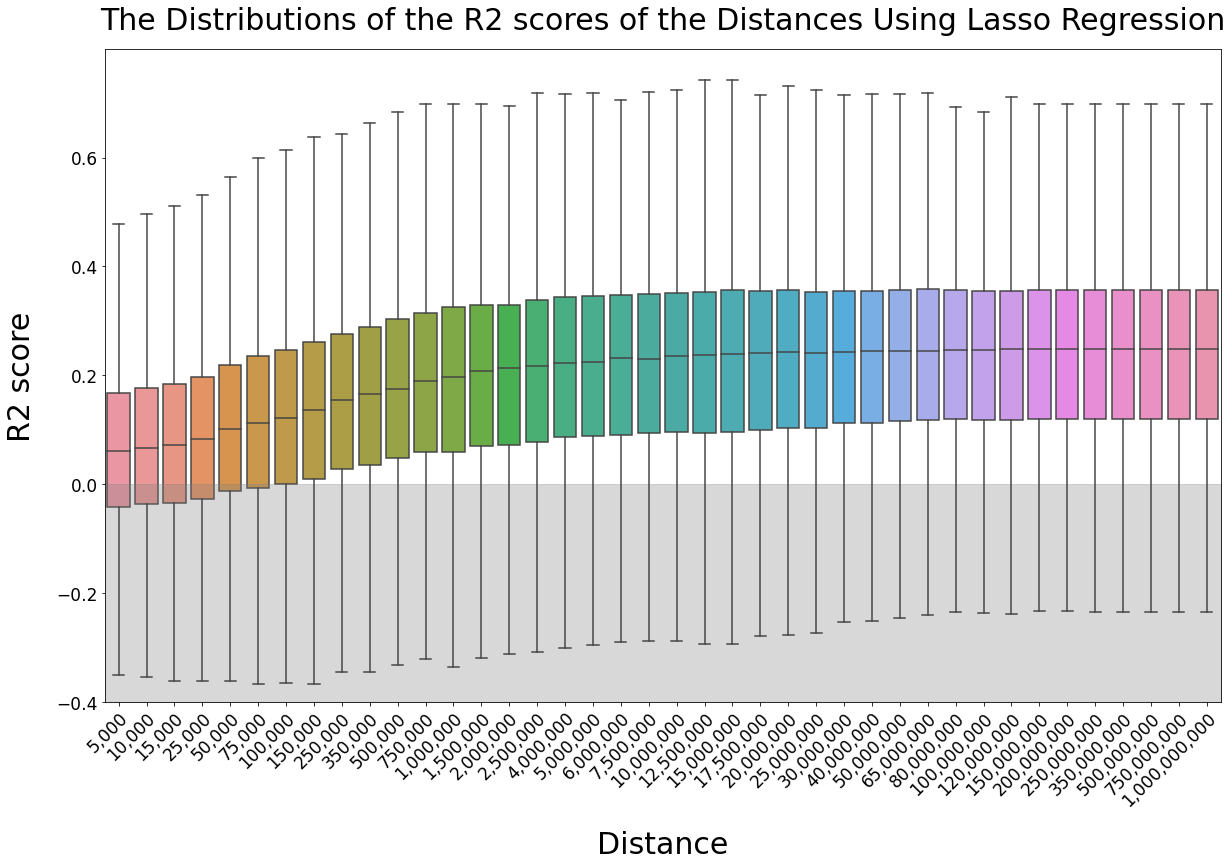

In [14]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=17)
ax.tick_params(axis='y', labelsize=17)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Lasso Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-0.4)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_all_distances_lasso_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

In addition, we can also display the median R<sup>2</sup> score for every distance. This can be achieved by calling the function 'median()'.

In [15]:
# Calculating the median of each of the distances of the 'R2_scores_all_distances' DataFrame by calling the function 
# 'median()'.
distance_medians = R2_scores_all_distances.median(numeric_only=True)

print("The median R2 score for every distributions of the 40 distances:")
distance_medians

The median R2 score for every distributions of the 40 distances:


5,000            0.060760
10,000           0.067161
15,000           0.072718
25,000           0.082880
50,000           0.100488
75,000           0.111563
100,000          0.122417
150,000          0.135746
250,000          0.154808
350,000          0.165086
500,000          0.175700
750,000          0.190242
1,000,000        0.196545
1,500,000        0.207203
2,000,000        0.213973
2,500,000        0.217960
4,000,000        0.222949
5,000,000        0.224919
6,000,000        0.230939
7,500,000        0.229612
10,000,000       0.234775
12,500,000       0.237223
15,000,000       0.238256
17,500,000       0.240245
20,000,000       0.242161
25,000,000       0.240726
30,000,000       0.243735
40,000,000       0.244891
50,000,000       0.244131
65,000,000       0.244689
80,000,000       0.246858
100,000,000      0.246493
120,000,000      0.247504
150,000,000      0.248386
200,000,000      0.247850
250,000,000      0.248104
350,000,000      0.248104
500,000,000      0.248104
750,000,000 

As we can see from the box plots above, there is a steady increase in the median of the distributions of R<sup>2</sup> scores when the distance increases. This can also be verified by examining the median R<sup>2</sup> scores displayed above. Therefore, we can already make the conclusion that while using lasso regression the larger distances perform better. The increase in median R<sup>2</sup> score continues up until a distance of 250,000,000 where for even larger distances there does not seem to be any difference between the distributions. This can also be seen in the median R<sup>2</sup> scores being displayed before where the last 5 distances experimented with all have the same median R<sup>2</sup> score: 0.248104. This makes sense and is expected since as we can see from the 'chromosomes_length_data' DataFrame the chromosome with the largest length (chromosome 1) has a length of 249,250,621. This means since we only consider CpG sites for predicting a gene expression value that are located on the same chromosome as the gene, there are no additional CpG sites consider when increasing the distance from 250,000,000 to any other value. Therefore, we can also exclude these distances greater than 250,000,000 from the plot.

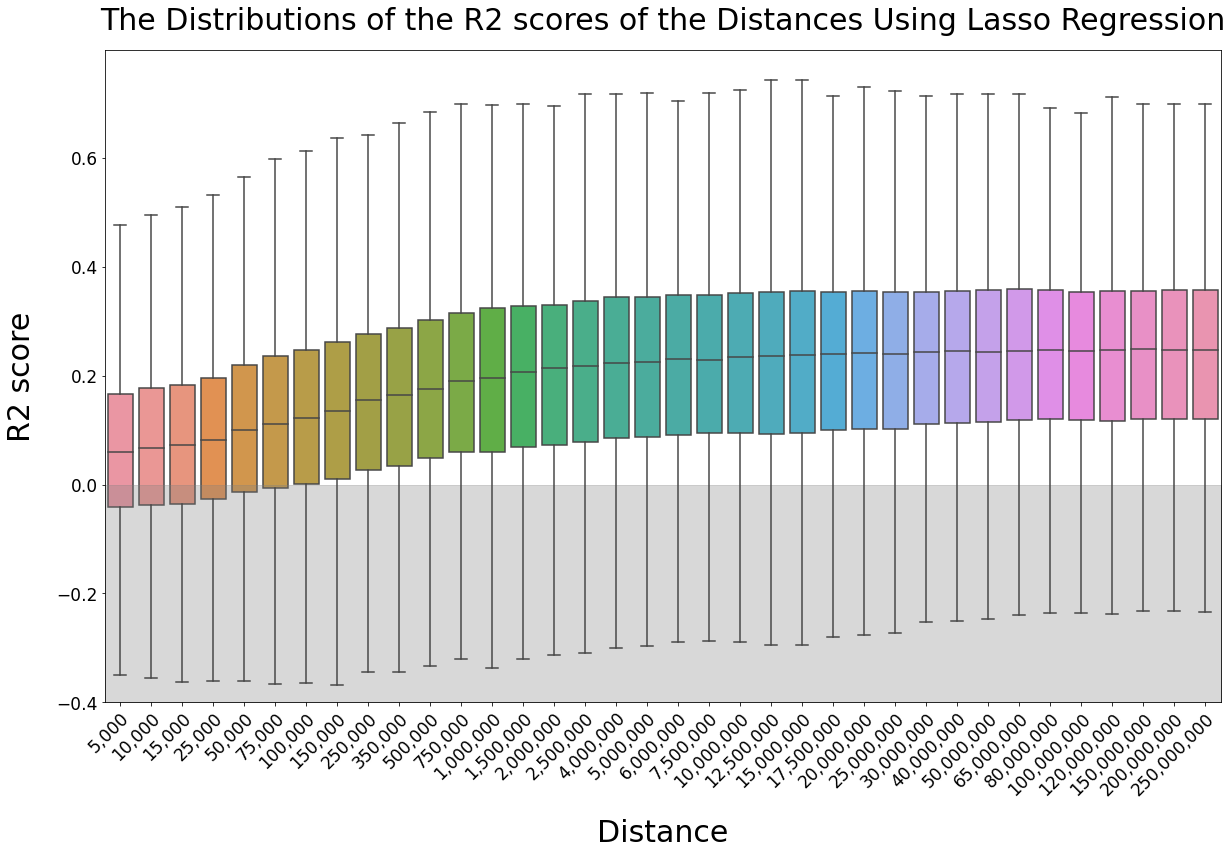

In [16]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances.iloc[:, :36], showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=17)
ax.tick_params(axis='y', labelsize=17)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Lasso Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-0.4)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns[:36]) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_distances_until_250000000_lasso_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

To increase the quality of the visualization to come to a conclusion as to when the median R<sup>2</sup> scores do not seem to increase anymore indicating that the distance right before it stops increasing actually performs the best we can focus a bit more on these by exclusively displaying these in the next plot.

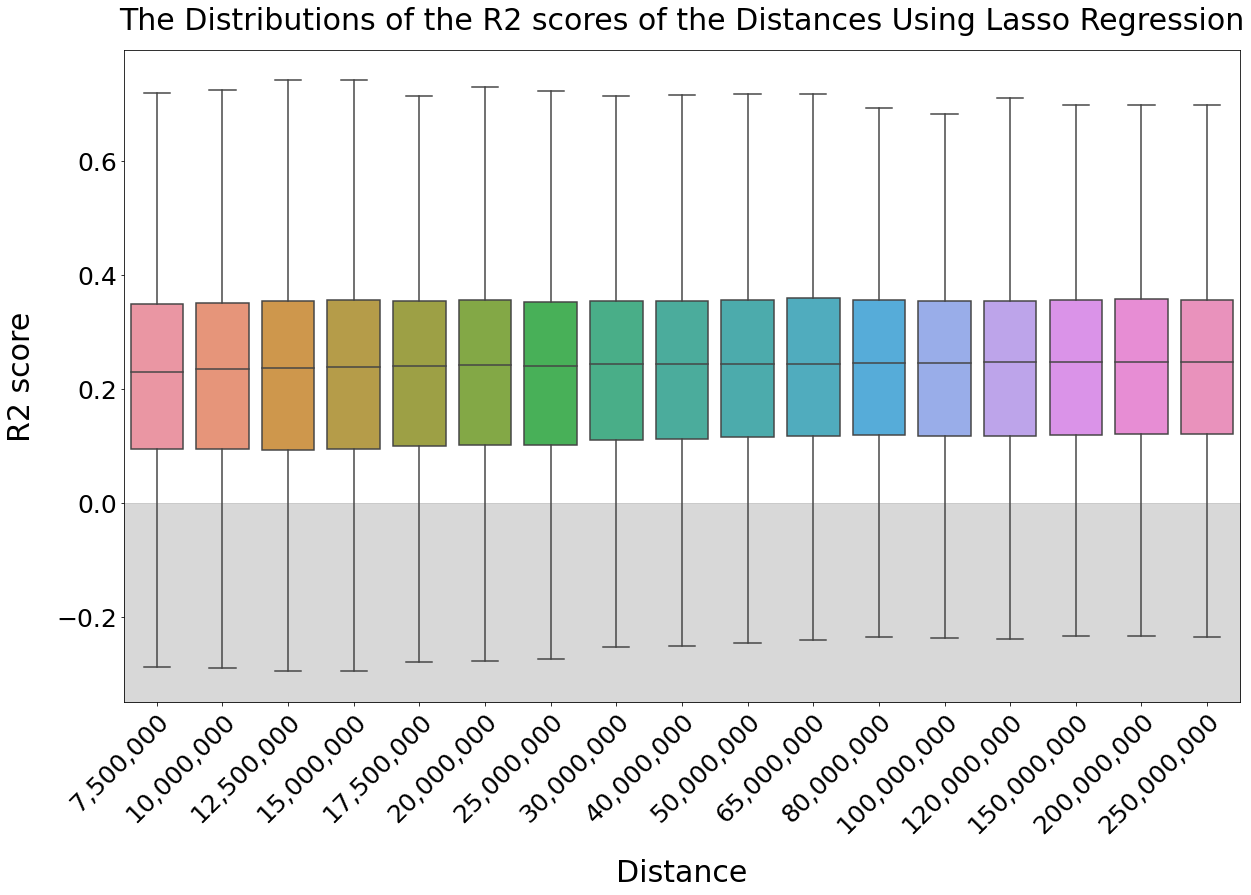

In [17]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances.iloc[:, 19:36], showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=25)
ax.tick_params(axis='y', labelsize=25)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Lasso Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-0.35)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns[19:36]) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_distances_from_7500000_lasso_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

As we can see from the box plots above, from a distance of 7,500,000 onwards there is still (although slight) an increase in the median R<sup>2</sup> score when the distance is increased. We can conclude that a distance of 150,000,000 results in the highest prediction accuracy which can also be verified in the code below. It is important to note, however, that the differences in terms of median R<sup>2</sup> score with any of the surrounding distances is not that large.

In [18]:
# Retrieving the maximum median R2 score in the 'distance_medians' list by calling the function 'max()'.
max_median = max(distance_medians[:36])

# Retrieving the distances which have the highest median present in the 'distances_medians' list.
distance_with_highest_median = distance_medians[:36][distance_medians == max_median].index.tolist()

print("Distance with the highest median: ", distance_with_highest_median)

Distance with the highest median:  ['150,000,000']
